<a href="https://colab.research.google.com/github/TeeCara/colab-yolo/blob/main/%EC%BD%94%EB%9E%A9%20%EC%9A%9C%EB%A1%9C2%EB%B2%88%EC%A7%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">
  <h1>Colab 시작 페이지</h1>
</div>

<div class="markdown-google-sans">
  <h2>&#40;신규&#41; Gemini API를 사용해 보세요</h2>
  <ul>
  <li><a href="https://makersuite.google.com/app/apikey">Generate a Gemini API key</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Talk_to_Gemini_with_Google%27s_Speech_to_Text_API.ipynb?utm_medium=link&utm_campaign=gemini">Talk to Gemini with the Speech-to-Text API</a></li>
  <li><a href="https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/tutorials/quickstart_colab.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API: Quickstart with Python</a></li>
  <li><a href="https://colab.research.google.com/notebooks/snippets/gemini.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API code sample</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Learning_with_Gemini_and_ChatGPT.ipynb?utm_medium=link&utm_campaign=gemini">Compare Gemini with ChatGPT</a></li>  
  <li><a href="https://colab.google/notebooks/?utm_medium=link&utm_campaign=gemini">More notebooks</a></li>
  </ul>
</div>


Colab에 이미 익숙하다면 이 동영상을 통해 양방향 테이블, 코드 실행 기록 보기, 명령어 팔레트에 관해 알아보세요.

<center>
  <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y" target="_blank">
  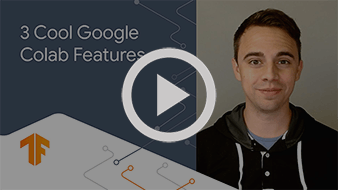
  </a>
</center>

In [ ]:
# 필요한 패키지 설치
%pip install ultralytics opencv-python-headless matplotlib

from google.colab import files

# 파일 업로드
uploaded = files.upload()

# 업로드된 파일 이름 추출
filename = next(iter(uploaded))

# 파일을 지정된 디렉토리로 이동
!mkdir -p /content/sample_data
!mv {filename} /content/sample_data/{filename}

Saving 202009271101188.jpg to 202009271101188.jpg


100%|██████████| 6.25M/6.25M [00:00<00:00, 21.1MB/s]



image 1/1 /content/sample_data/202009271101188.jpg: 288x640 29 cars, 1 truck, 239.8ms
Speed: 17.7ms preprocess, 239.8ms inference, 28.4ms postprocess per image at shape (1, 3, 288, 640)


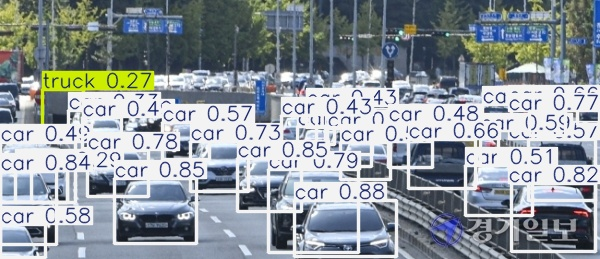

In [ ]:
from ultralytics import YOLO
from IPython.display import Image, display

model = YOLO('yolov8n.pt')

image_path = '/content/sample_data/202009271101188.jpg'

results = model.predict(image_path)
first_result = results[0]
first_result.save()
saved_image_path = '/content/results_202009271101188.jpg'
display(Image(saved_image_path))

In [5]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

# 이미지 캡처
image_path = take_photo() # 'photo.jpg' 파일에 이미지 저장


<IPython.core.display.Javascript object>

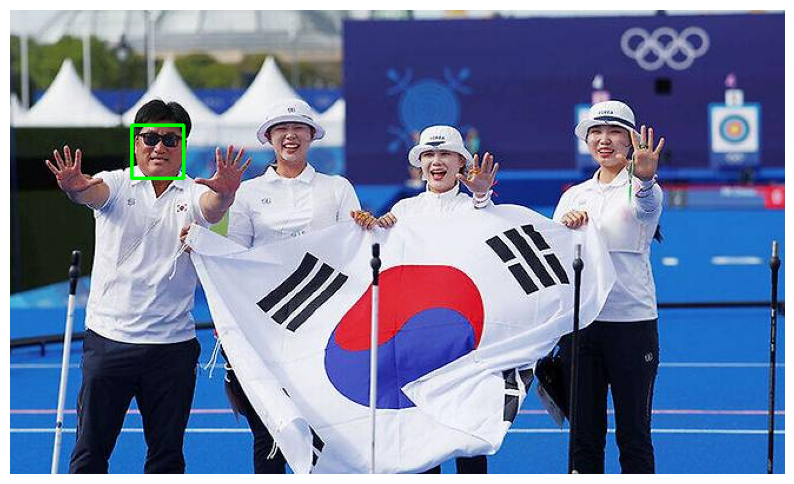

In [6]:
!pip install dlib opencv-python
from matplotlib import pyplot as plt
import cv2
import dlib
import numpy as np
import urllib.request
def download_image(image_url):
    resp = urllib.request.urlopen(image_url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    return image
def detect_faces(image):
    detector = dlib.get_frontal_face_detector()
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = detector(gray, 1)
    for face in faces:
        x, y, w, h = face.left(), face.top(), face.width(), face.height()
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    return image
def show_image(image):
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()
# URL 수정 필요
image_url = "https://img4.daumcdn.net/thumb/R658x0.q70/?fname=https://t1.daumcdn.net/news/202407/29/segye/20240729005927718rivm.jpg"
image = download_image(image_url)
image_with_faces = detect_faces(image)
show_image(image_with_faces)







